<a href="https://colab.research.google.com/github/Ayryslaine/analise_venda_casas_usa/blob/main/analise_venda_casas_usa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perguntas as quais irei responder, para analisar a venda de casas no EUA

 Qual o preço médio das casas?

 Qual a cidade com mais imóveis no dataset?

 Quantos quartos têm, em média, as casas vendidas?

 Em quais cidades as casas são mais caras?

 Casas com mais quartos têm preços mais altos?

 O preço médio varia entre os estados?

A área construída influencia diretamente no valor do imóvel?

Imóveis construídos mais recentemente são mais caros?

 Qual o tempo médio de venda de uma casa?

 Imóveis mais caros demoram mais ou menos pra serem vendidos?

 A idade da casa interfere no tempo que ela fica no mercado?

# Informações gerais sobre o nosso banco de dados

 Para começar a análise, vou mportar as bibliotecas necessárias e importar também meu conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("us_house_Sales_data.csv", sep= ",")

Importado todas as bibliotecas e o conjunto de dados, vamos verificar as 5 primeiras linhas e as 5 últimas linhas

In [2]:
df.head()

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,65383,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,Z104635,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/80374762_zpid/
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,79339,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Z535721,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86143665_zpid/
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,87393,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,Z900458,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/37082403_zpid/
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,38666,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Z318589,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/39318132_zpid/
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,23989,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Z899716,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/22454634_zpid/


In [3]:
df.tail()

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
2995,"$801,824","4167 Oak Ave, San Diego, TX 78499",San Diego,78499,TX,3 bds,4 ba,3318 sqft,6745 sqft,2022,61,Multi-Family,Z284935,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/50860042_zpid/
2996,"$843,703","5606 Pine Rd, Sacramento, CA 39627",Sacramento,39627,CA,6 bds,2 ba,900 sqft,8046 sqft,2012,64,Multi-Family,Z842214,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/33603937_zpid/
2997,"$743,513","6230 Maple Dr, Fresno, TX 62804",Fresno,62804,TX,4 bds,3 ba,2921 sqft,2041 sqft,2005,48,Multi-Family,Z350999,Jane Smith - Keller Williams,Sold,https://www.zillow.com/homedetails/44710479_zpid/
2998,"$211,664","8683 Main St, San Diego, TX 99740",San Diego,99740,TX,2 bds,4 ba,701 sqft,1344 sqft,2017,117,Single Family,Z748192,Alex Johnson - Compass,Pending,https://www.zillow.com/homedetails/41368665_zpid/
2999,"$712,029","4392 Maple Dr, Los Angeles, NY 89198",Los Angeles,89198,NY,4 bds,3 ba,2967 sqft,8071 sqft,1985,32,Condo,Z876426,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/64854326_zpid/


Só com as 5 primeiras e últimas linhas, podemos verificar algumas inconsistências de tipo de dado em algumas colunas, também podemos ver algumas colunas que não serão necessárias na nossa análise.

Agora, vamos pegar informações gerais sobre os dados, como nomes das colunas e o tipo de dado

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           3000 non-null   object
 1   Address         3000 non-null   object
 2   City            3000 non-null   object
 3   Zipcode         3000 non-null   int64 
 4   State           3000 non-null   object
 5   Bedrooms        3000 non-null   object
 6   Bathrooms       3000 non-null   object
 7   Area (Sqft)     3000 non-null   object
 8   Lot Size        3000 non-null   object
 9   Year Built      3000 non-null   int64 
 10  Days on Market  3000 non-null   int64 
 11  Property Type   3000 non-null   object
 12  MLS ID          3000 non-null   object
 13  Listing Agent   3000 non-null   object
 14  Status          3000 non-null   object
 15  Listing URL     3000 non-null   object
dtypes: int64(3), object(13)
memory usage: 375.1+ KB


Após utilizar a função info, podemos ver que nosso conjunto de dados tem 16 colunas, 3000 entradas de dados (ou seja, 3000 dados) e que não possui valores nulos. Além disso, os tipos de dados das colunas estão divididos em str e int

# Verificando se há valores nulos ou faltantes

Nesta seção, veremos se o nosso dataframe tem valores nulos/faltantes, onde True significa que aquele valor é nulo (faltante) e False significa que o valor está presente.

Vimos que na função df.info() foi apresentado que não existe valores nulos, mas é sempre importante confirmar

In [5]:
df.isnull()

,Price,Address,City,Zipcode,State,Bedrooms,Bathrooms,Area (Sqft),Lot Size,Year Built,Days on Market,Property Type,MLS ID,Listing Agent,Status,Listing URL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Conseguimos confirmar que em nenhuma coluna há valores nulos

Outra forma de ver se o nosso dataframe tem valores nulos/faltantes é juntando a função isnull() com função sum(). Dessa forma, a função irá contabilizar quantos valores nulos existem em cada coluna

In [6]:
df.isnull().sum()

,0
Price,0
Address,0
City,0
Zipcode,0
State,0
Bedrooms,0
Bathrooms,0
Area (Sqft),0
Lot Size,0
Year Built,0


Com as duas funções, podemos perceber que nosso dataframe está completo, sem valores faltantes ou nulos.

# Verificando se há valores duplicados

Outra verificação importante, é vermos se em nosso conjunto de dados há valores duplicados. Para isso, podemos utilizar a função duplicated(), mas também podemos juntar essa função a função sum(), assimo como na função isnull()

In [9]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2995,False
2996,False
2997,False
2998,False


In [10]:
df.duplicated().sum()

np.int64(0)

Ambas as funções, nos apresentou que em nosso conjunto de dados não possui valores duplicados

# Feita a limpeza e tratamento dos dados, partiremos para a transformação dos dados para melhor entendimento, antes de realizarmos a análise descritiva

O primeiro tratamento que faremos, é renomear as colunas utilizando a função rename()

In [11]:
df.rename(columns={
    "Price" : "Preço",
    "Address" : "Endereço",
    "City": "Cidade",
    "Zipcode": "Código",
    "State": "Estado",
    "Bedrooms": "Quartos",
    "Bathrooms": "Banheiros",
    "Area (Sqft)": "Área",
    "Lot Size": "Tamanho do lote",
    "Year Built": "Ano de construção",
    "Days on Market" : "Dias à venda",
    "Property Type": "Tipo de propriedade",
    }, inplace = True )

Agora, vamos verificar como ficou nossas colunas com a mudança

In [12]:
display(df)

,Preço,Endereço,Cidade,Código,Estado,Quartos,Banheiros,Área,Tamanho do lote,Ano de construção,Dias à venda,Tipo de propriedade,MLS ID,Listing Agent,Status,Listing URL
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,65383,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,Z104635,Alex Johnson - Compass,For Sale,https://www.zillow.com/homedetails/80374762_zpid/
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,79339,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Z535721,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/86143665_zpid/
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,87393,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,Z900458,Mike Lee - Coldwell Banker,For Sale,https://www.zillow.com/homedetails/37082403_zpid/
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,38666,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Z318589,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/39318132_zpid/
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,23989,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Z899716,John Doe - RE/MAX,Pending,https://www.zillow.com/homedetails/22454634_zpid/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,"$801,824","4167 Oak Ave, San Diego, TX 78499",San Diego,78499,TX,3 bds,4 ba,3318 sqft,6745 sqft,2022,61,Multi-Family,Z284935,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/50860042_zpid/
2996,"$843,703","5606 Pine Rd, Sacramento, CA 39627",Sacramento,39627,CA,6 bds,2 ba,900 sqft,8046 sqft,2012,64,Multi-Family,Z842214,Emily Davis - Century 21,Sold,https://www.zillow.com/homedetails/33603937_zpid/
2997,"$743,513","6230 Maple Dr, Fresno, TX 62804",Fresno,62804,TX,4 bds,3 ba,2921 sqft,2041 sqft,2005,48,Multi-Family,Z350999,Jane Smith - Keller Williams,Sold,https://www.zillow.com/homedetails/44710479_zpid/
2998,"$211,664","8683 Main St, San Diego, TX 99740",San Diego,99740,TX,2 bds,4 ba,701 sqft,1344 sqft,2017,117,Single Family,Z748192,Alex Johnson - Compass,Pending,https://www.zillow.com/homedetails/41368665_zpid/


O segundo tratamento que faremos é remover algumas colunas que não serão necessárias em nossa análise pois não nos dizem nada em termos de análise

In [13]:
df.drop(columns={
    "MLS ID",
    "Listing Agent",
    "Listing URL",
    "Código"}, inplace=True, axis=1 ) #inplace=True altera o dataframe original

Para remover as colunas, utilizamos a função drop(). Dentro da função utilizamos dois parâmetros: o inplace=True significa que estou alterando o conjunto de dados original e o axis=1 significa que estamos selecionando as colunas, o eixo vertical

Agora vamos verificar como ficou o nosso conjunto de dados após a remoção

In [14]:
display(df)

,Preço,Endereço,Cidade,Estado,Quartos,Banheiros,Área,Tamanho do lote,Ano de construção,Dias à venda,Tipo de propriedade,Status
0,"$554,217","5926 Oak Ave, San Diego, CA 65383",San Diego,CA,1 bds,3 ba,772 sqft,4757 sqft,1959,101,Townhouse,For Sale
1,"$164,454","9583 Oak Ave, Fresno, IL 79339",Fresno,IL,1 bds,1 ba,2348 sqft,3615 sqft,1969,46,Apartment,Sold
2,"$1,249,331","8224 Oak Ave, Sacramento, TX 87393",Sacramento,TX,6 bds,1 ba,3630 sqft,9369 sqft,1990,59,Townhouse,For Sale
3,"$189,267","232 Oak Ave, Fresno, TX 38666",Fresno,TX,2 bds,1 ba,605 sqft,8804 sqft,1958,119,Apartment,Pending
4,"$465,778","5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,CA,3 bds,2 ba,1711 sqft,9260 sqft,2020,26,Townhouse,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,"$801,824","4167 Oak Ave, San Diego, TX 78499",San Diego,TX,3 bds,4 ba,3318 sqft,6745 sqft,2022,61,Multi-Family,Sold
2996,"$843,703","5606 Pine Rd, Sacramento, CA 39627",Sacramento,CA,6 bds,2 ba,900 sqft,8046 sqft,2012,64,Multi-Family,Sold
2997,"$743,513","6230 Maple Dr, Fresno, TX 62804",Fresno,TX,4 bds,3 ba,2921 sqft,2041 sqft,2005,48,Multi-Family,Sold
2998,"$211,664","8683 Main St, San Diego, TX 99740",San Diego,TX,2 bds,4 ba,701 sqft,1344 sqft,2017,117,Single Family,Pending


O terceiro tratamento que faremos é transformar algumas colunas que estão como 'object', ou seja, str, mas que é necessário que estejam em float ou int

Primeiro, vamos verificar novamente quais colunas estão como object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Preço                3000 non-null   object
 1   Endereço             3000 non-null   object
 2   Cidade               3000 non-null   object
 3   Estado               3000 non-null   object
 4   Quartos              3000 non-null   object
 5   Banheiros            3000 non-null   object
 6   Área                 3000 non-null   object
 7   Tamanho do lote      3000 non-null   object
 8   Ano de construção    3000 non-null   int64 
 9   Dias à venda         3000 non-null   int64 
 10  Tipo de propriedade  3000 non-null   object
 11  Status               3000 non-null   object
dtypes: int64(2), object(10)
memory usage: 281.4+ KB


Após analisar, podemos perceber que existem 5 colunas que estão como tipo object, mas deveriam estar como int ou float, são elas: Preço, Quartos, Banheiros, Área e Tamanho do lote

In [16]:
df['Preço'] = df['Preço'].apply(lambda Preço: str(Preço).replace(",", "").replace("$",""))

In [17]:
df['Quartos'] = df['Quartos'].apply(lambda Quartos: str(Quartos).replace(" bds",""))

In [18]:
df['Banheiros'] = df['Banheiros'].apply(lambda Banheiros: str(Banheiros).replace(" ba",""))

In [19]:
df['Tamanho do lote'] = df['Tamanho do lote'].apply(lambda Banheiros: str(Banheiros).replace(" sqft",""))

In [20]:
df['Área'] = df['Área'].apply(lambda Banheiros: str(Banheiros).replace(" sqft",""))

Na função acima, estamos utilizando o Lambda que significa que "para cada valor da coluna, pega esse valor → transforma em string → e substitui pela troca respectiva."

Vamos verificar como ficou o nosso dataframe

In [21]:
display(df)

,Preço,Endereço,Cidade,Estado,Quartos,Banheiros,Área,Tamanho do lote,Ano de construção,Dias à venda,Tipo de propriedade,Status
0,554217,"5926 Oak Ave, San Diego, CA 65383",San Diego,CA,1,3,772,4757,1959,101,Townhouse,For Sale
1,164454,"9583 Oak Ave, Fresno, IL 79339",Fresno,IL,1,1,2348,3615,1969,46,Apartment,Sold
2,1249331,"8224 Oak Ave, Sacramento, TX 87393",Sacramento,TX,6,1,3630,9369,1990,59,Townhouse,For Sale
3,189267,"232 Oak Ave, Fresno, TX 38666",Fresno,TX,2,1,605,8804,1958,119,Apartment,Pending
4,465778,"5446 Pine Rd, Los Angeles, CA 23989",Los Angeles,CA,3,2,1711,9260,2020,26,Townhouse,Pending
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,801824,"4167 Oak Ave, San Diego, TX 78499",San Diego,TX,3,4,3318,6745,2022,61,Multi-Family,Sold
2996,843703,"5606 Pine Rd, Sacramento, CA 39627",Sacramento,CA,6,2,900,8046,2012,64,Multi-Family,Sold
2997,743513,"6230 Maple Dr, Fresno, TX 62804",Fresno,TX,4,3,2921,2041,2005,48,Multi-Family,Sold
2998,211664,"8683 Main St, San Diego, TX 99740",San Diego,TX,2,4,701,1344,2017,117,Single Family,Pending


Porém, apesar de termos substituído os caracteres e espaços que não eram necessários, as nossas colunas continuam sendo do tipo "object", como podemos ver a seguir:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Preço                3000 non-null   object
 1   Endereço             3000 non-null   object
 2   Cidade               3000 non-null   object
 3   Estado               3000 non-null   object
 4   Quartos              3000 non-null   object
 5   Banheiros            3000 non-null   object
 6   Área                 3000 non-null   object
 7   Tamanho do lote      3000 non-null   object
 8   Ano de construção    3000 non-null   int64 
 9   Dias à venda         3000 non-null   int64 
 10  Tipo de propriedade  3000 non-null   object
 11  Status               3000 non-null   object
dtypes: int64(2), object(10)
memory usage: 281.4+ KB


Para fazermos essa conversão, utilizamos a função astype()

Converterei as colunas da seguinte forma: Preço(int) - Quartos(int) - Banheiros(int) - Área(int) - Tamanho do lote(int)

In [23]:
df['Preço'] = df['Preço'].astype('int64')

In [24]:
df['Quartos'] = df['Quartos'].astype('int64')

In [25]:
df['Banheiros'] = df['Banheiros'].astype('int64')

In [26]:
df['Área'] = df['Área'].astype('int64')

In [27]:
df['Tamanho do lote'] = df['Tamanho do lote'].astype('int64')

Vamos confirmar se a alteração deu tudo certo:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Preço                3000 non-null   int64 
 1   Endereço             3000 non-null   object
 2   Cidade               3000 non-null   object
 3   Estado               3000 non-null   object
 4   Quartos              3000 non-null   int64 
 5   Banheiros            3000 non-null   int64 
 6   Área                 3000 non-null   int64 
 7   Tamanho do lote      3000 non-null   int64 
 8   Ano de construção    3000 non-null   int64 
 9   Dias à venda         3000 non-null   int64 
 10  Tipo de propriedade  3000 non-null   object
 11  Status               3000 non-null   object
dtypes: int64(7), object(5)
memory usage: 281.4+ KB


Agora que fizemos todo o tratamento necessário, seguiremos para resolução das perguntas mencionadas no início deste arquivo

# Métricas estatísticas gerais

Para começar a nossa análise, vamos iniciar com as métricas estatísticas dos dados

In [29]:
df.describe()

,Preço,Quartos,Banheiros,Área,Tamanho do lote,Ano de construção,Dias à venda
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8.108594e+05,3.469667,2.501667,2278.950667,5499.022333,1986.814333,61.199333
std,3.997320e+05,1.706278,1.121792,977.406975,2628.573865,21.272252,34.890983
min,1.002830e+05,1.000000,1.000000,600.000000,1000.000000,1950.000000,1.000000
25%,4.703870e+05,2.000000,1.000000,1440.750000,3183.500000,1968.000000,31.000000
50%,8.156300e+05,3.000000,2.000000,2274.500000,5543.500000,1987.000000,62.000000
75%,1.158188e+06,5.000000,4.000000,3111.000000,7799.000000,2006.000000,91.000000
max,1.499473e+06,6.000000,4.000000,3999.000000,9996.000000,2023.000000,120.000000


Podemos observar que na função describe faltou algumas colunas e isso ocorre pois a função só apresenta as métricas estatísticas dos dados que são int ou float, ignorando os dados object. Para incluirmos as colunas object, devemos informar na função, dentro dos parênteses

In [30]:
df.describe(include=[object])

,Endereço,Cidade,Estado,Tipo de propriedade,Status
count,3000,3000,3000,3000,3000
unique,3000,5,5,5,3
top,"4392 Maple Dr, Los Angeles, NY 89198",Los Angeles,CA,Apartment,Sold
freq,1,617,659,622,1045


# Análise dos dados

O raciocínio que seguirei para analisar os dados, será seguir a ordens das perguntas que são apresentadas no início deste notebook. Quando necessário, falei gráficos para melhor visualização

1º pergunta: Qual o preço médio das casas?

In [31]:
media_preco_casas = np.mean(df["Preço"])
print(f"A média de preço das casas é: {media_preco_casas:.2f}")

A média de preço das casas é: 810859.36


O preço médio das casas, independente de local ou área, é R$810.859

 2º pergunta: Qual a cidade com mais imóveis?

Para responder essa pergunta utilizaremos a função value_counts() que conta quantas vezes um determinado valor aparece

In [32]:
cidade_mais_imoveis = df["Cidade"].value_counts().head()
print(cidade_mais_imoveis)

Cidade
Los Angeles      617
Sacramento       609
San Francisco    605
San Diego        586
Fresno           583
Name: count, dtype: int64


A função nos deu o resultado em formato de Series. Como queremos passar esse resultado para um gráfico, para melhor visualização, antes transformarei essa Series em um DataFrame

Através da função reset_index(), irei transformar a Series acima em um DataFrame, de forma que o índice se transforme em coluna. Vamos visualizar o resultado:

In [37]:
df_imoveis = cidade_mais_imoveis.reset_index()
print(df_imoveis)

          Cidade  count
0    Los Angeles    617
1     Sacramento    609
2  San Francisco    605
3      San Diego    586
4         Fresno    583


Para melhorar a visualização do DataFrame imoveis, vamos definir as colunas. Dessa forma, o nosso DF passa a ter índices e duas colunas, sendo elas Cidade e Quantidade:

In [38]:
df_imoveis.columns = ["Cidade","Quantidade de Imóveis"]
print(df_imoveis)

          Cidade  Quantidade de Imóveis
0    Los Angeles                    617
1     Sacramento                    609
2  San Francisco                    605
3      San Diego                    586
4         Fresno                    583


Agora, vamos visualizar a quantidade de cidades em um gráfico, para melhor entendimento da diferença de imóveis por cidade

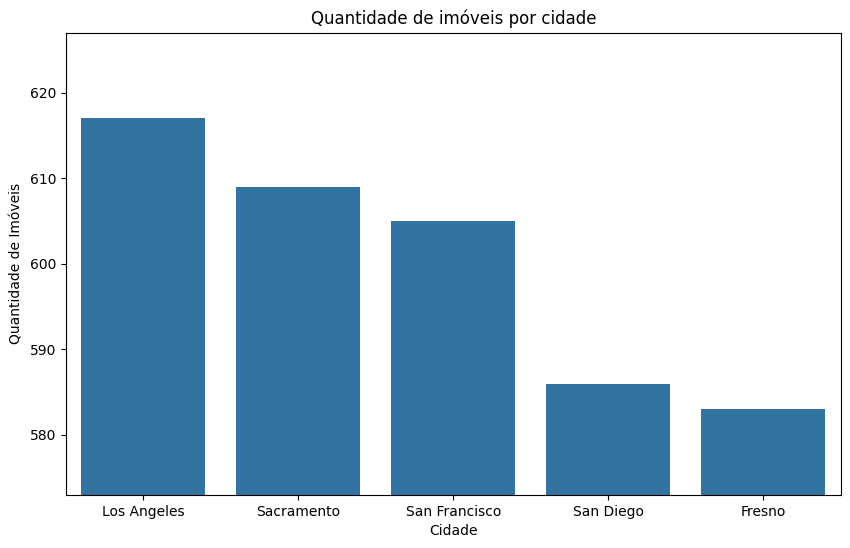

In [39]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_imoveis, x="Cidade", y="Quantidade de Imóveis")

plt.ylim(df_imoveis["Quantidade de Imóveis"].min() - 10, df_imoveis["Quantidade de Imóveis"].max() + 10)

"""
Na linha de código acima, estamos pegando o valor mínimo dos dados e diminuindo por 10, e o mesmo para o valor máximo, só que aumentando por 10.
De forma que o eixo y fica maior para que possamos visualizar melhor a quantidade de imóveis de todas as cidades.
"""

plt.title("Quantidade de imóveis por cidade")
plt.xlabel("Cidade")
plt.ylabel("Quantidade de Imóveis")

plt.show()

Logo, podemos perceber que a cidade com o maior número de imóveis, independentemente de estarem vendidos, pendentes ou à venda, é Los Angeles.

Agora que identificamos Los Angeles como a cidade com maior número de imóveis, será que o resultado se manterá ao filtrarmos os dados por status, considerando apenas os imóveis vendidos ou à venda?

Para imóveis com o status "vendido":

In [41]:
cidade_mais_imoveis_vendidos = df[df["Status"] == "Sold"]["Cidade"].value_counts().head()
print(cidade_mais_imoveis_vendidos)

Cidade
Sacramento       215
Los Angeles      214
San Diego        208
Fresno           205
San Francisco    203
Name: count, dtype: int64


Podemos observar que o resultado se alterou: a cidade com a maior quantidade de imóveis vendidos é Sacramento.

Vamos visualizar essa alteração graficamente:

In [67]:
df_imoveis_mais_vendidos = cidade_mais_imoveis_vendidos.reset_index()
df_imoveis_mais_vendidos.columns = ["Cidade", "Quantidade de imóveis vendidos"]
print(df_imoveis_mais_vendidos)

          Cidade  Quantidade de imóveis vendidos
0     Sacramento                             215
1    Los Angeles                             214
2      San Diego                             208
3         Fresno                             205
4  San Francisco                             203


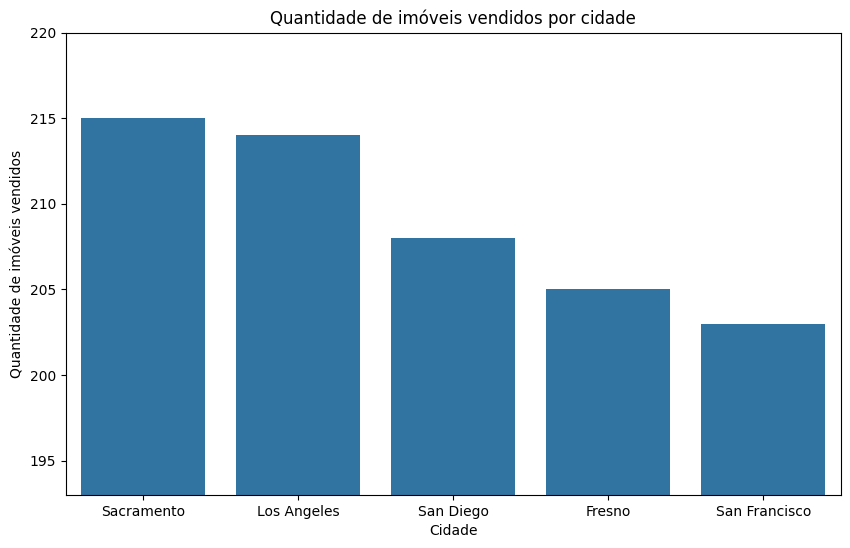

In [68]:
plt.figure(figsize=(10,6))

sns.barplot(data= df_imoveis_mais_vendidos, x="Cidade", y="Quantidade de imóveis vendidos")

plt.ylim(df_imoveis_mais_vendidos["Quantidade de imóveis vendidos"].min() - 10, df_imoveis_mais_vendidos["Quantidade de imóveis vendidos"].max() + 5)

plt.title("Quantidade de imóveis vendidos por cidade")
plt.xlabel("Cidade")
plt.ylabel("Quantidade de imóveis vendidos")

plt.show()

Para imóveis com o status "à venda":

In [62]:
cidade_mais_imoveis_a_venda = df[df["Status"] == "For Sale"]["Cidade"].value_counts().head()
print(cidade_mais_imoveis_a_venda)

Cidade
San Francisco    203
Los Angeles      202
Fresno           192
Sacramento       184
San Diego        176
Name: count, dtype: int64


No caso dos imóveis à venda, a cidade com a maior quantidade é San Francisco.

Vamos visualizar em um gráfico:

In [69]:
df_mais_imoveis_a_venda = cidade_mais_imoveis_a_venda.reset_index()
df_mais_imoveis_a_venda.columns = ["Cidade", "Quantidade de imóveis à venda"]
print(df_mais_imoveis_a_venda)

          Cidade  Quantidade de imóveis à venda
0  San Francisco                            203
1    Los Angeles                            202
2         Fresno                            192
3     Sacramento                            184
4      San Diego                            176


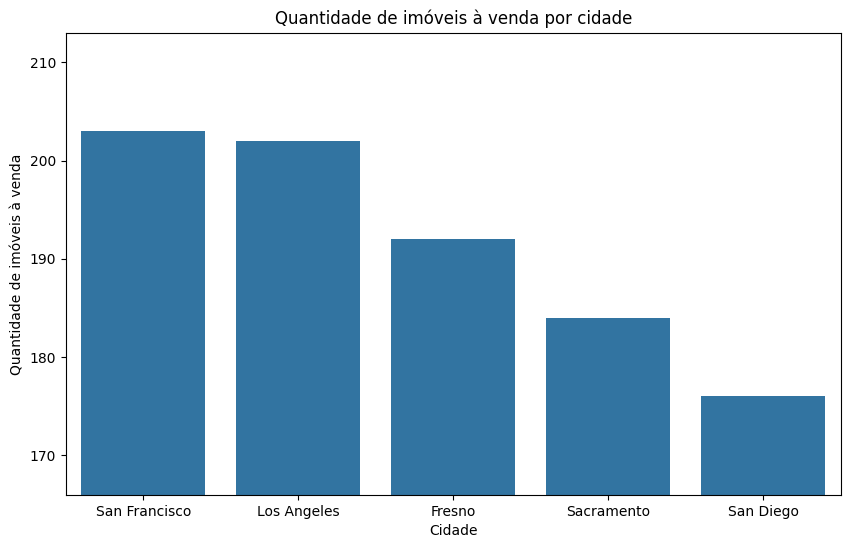

In [66]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_mais_imoveis_a_venda, x="Cidade", y="Quantidade de imóveis à venda")

plt.ylim(df_mais_imoveis_a_venda["Quantidade de imóveis à venda"].min() - 10, df_mais_imoveis_a_venda["Quantidade de imóveis à venda"].max() + 10)

plt.title("Quantidade de imóveis à venda por cidade")
plt.xlabel("Cidade")
plt.ylabel("Quantidade de imóveis à venda")

plt.show()

3º pergunta: Quantos quartos têm, em média, as casas vendidas?

In [ ]:
media_quartos = df[df["Status"] == "Sold"]["Quartos"].mean()
print(f"A média de quartos por casa vendida é: {media_quartos:.0f}")

A média de quartos por casa vendida é: 3


A média de quartos dos imóveis, é de 3 quartos.

Para complementar a análise, vamos verificar se a média de quartos varia conforme o tipo de propriedade.

In [80]:
media_quartos_propriedade = df.groupby("Tipo de propriedade")["Quartos"].mean().round(0)
print(media_quartos_propriedade)

Tipo de propriedade
Apartment        3.0
Condo            3.0
Multi-Family     3.0
Single Family    3.0
Townhouse        4.0
Name: Quartos, dtype: float64


Podemos observar que a única propriedade cuja média de quartos varia é a Townhouse: enquanto as demais apresentam média de 3 quartos, a Townhouse possui média de 4 quartos